# Importaciones


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Noviembre 2024-(E145).xlsx to Noviembre 2024-(E145).xlsx


### Lectura

In [4]:
df=pd.read_excel("Noviembre 2024-(E145).xlsx",sheet_name="Datos Acumulados")
display(df.head(10))

,Datos Acum,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Mes,Local,NaN,Sección,NaN,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto,Var Año Anterior Ticket Rema Local %,Var Año Anterior Ticket Retail Local %
1,Noviembre,E145,EASY SAN LUIS,12,SECCIÃN TEXTIL HOGAR,30130015,0.61,27140736,0.6858,1434,1554,1.0023,-2548,-2117,0.5122,15047702.641962,0.025201,49393467.213115,NaN,NaN
2,Noviembre,E145,EASY SAN LUIS,13,SECCIÃN FERRETERIA,39273987,0.76,31324644,0.8288,1869,1794,0.881,-2548,-2117,0.4524,20879312.599681,0.032849,51676298.684211,NaN,NaN
3,Noviembre,E145,EASY SAN LUIS,16,SECCIÃN MENAJE Y DECO,44328939,0.7,39868081,0.7312,2110,2283,2.1273,-2548,-2117,0.6205,14174827.806734,0.037077,63327055.714286,NaN,NaN
4,Noviembre,E145,EASY SAN LUIS,23,SECCIÃN OUTDOOR,63827858,0.55,56477482,0.5972,3038,3234,1.14,-2548,-2117,0.5137,29826101.869159,0.053385,116050650.909091,NaN,NaN
5,Noviembre,E145,EASY SAN LUIS,39,SECCIÃN ELECTRO HOGAR,97210822,0.58,72210900,0.6314,4627,4135,0.6642,-2548,-2117,0.2616,58412944.357649,0.081307,167604865.517241,NaN,NaN
6,Noviembre,E145,EASY SAN LUIS,41,SECCIÃN BAÃOS Y COCINAS,58042991,0.47,43447386,0.476,2763,2488,0.2054,-2548,-2117,0.3152,48152473.037996,0.048547,123495725.531915,NaN,NaN
7,Noviembre,E145,EASY SAN LUIS,43,SECCIÃN CONSTRUCCIÃN,92382197,0.69,52147208,0.9054,4397,2986,0.4742,-2548,-2117,0.2191,62665986.297653,0.077268,133887242.028986,NaN,NaN
8,Noviembre,E145,EASY SAN LUIS,45,SECCIÃN HERRAMIENTAS,63615522,0.7,49731745,0.8477,3028,2848,0.5708,-2548,-2117,0.4136,40498804.430863,0.053208,90879317.142857,NaN,NaN
9,Noviembre,E145,EASY SAN LUIS,46,SECCIÃN AUTOMOTOR,22056905,0.31,19276874,0.3102,1050,1104,-0.3852,-2548,-2117,0.4713,35876553.350683,0.018448,71151306.451613,NaN,NaN


In [5]:
#Chequeo columnas, el dataset no parece estar correctamente dispuesto y ordenado
df.columns

Index(['Datos Acum', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

### No hay cabezaras de columna, se resuelve de la siguiente manera

In [6]:
# Primero se define la fila 0 como encabezado
df.columns = df.iloc[0]
#Se elimina la fila cero ya que ahora esta definido el encabezado
df= df.iloc[1:].reset_index(drop=True)

#Chequeo
df.head(5)

,Mes,Local,NaN,Sección,NaN,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto,Var Año Anterior Ticket Rema Local %,Var Año Anterior Ticket Retail Local %
0,Noviembre,E145,EASY SAN LUIS,12,SECCIÃN TEXTIL HOGAR,30130015,0.61,27140736,0.6858,1434,1554,1.0023,-2548,-2117,0.5122,15047702.641962,0.025201,49393467.213115,NaN,NaN
1,Noviembre,E145,EASY SAN LUIS,13,SECCIÃN FERRETERIA,39273987,0.76,31324644,0.8288,1869,1794,0.881,-2548,-2117,0.4524,20879312.599681,0.032849,51676298.684211,NaN,NaN
2,Noviembre,E145,EASY SAN LUIS,16,SECCIÃN MENAJE Y DECO,44328939,0.7,39868081,0.7312,2110,2283,2.1273,-2548,-2117,0.6205,14174827.806734,0.037077,63327055.714286,NaN,NaN
3,Noviembre,E145,EASY SAN LUIS,23,SECCIÃN OUTDOOR,63827858,0.55,56477482,0.5972,3038,3234,1.14,-2548,-2117,0.5137,29826101.869159,0.053385,116050650.909091,NaN,NaN
4,Noviembre,E145,EASY SAN LUIS,39,SECCIÃN ELECTRO HOGAR,97210822,0.58,72210900,0.6314,4627,4135,0.6642,-2548,-2117,0.2616,58412944.357649,0.081307,167604865.517241,NaN,NaN


### Hay columnas sin nombre definido, para hacer más entendible el dataset se le agregara un nombre relacionado

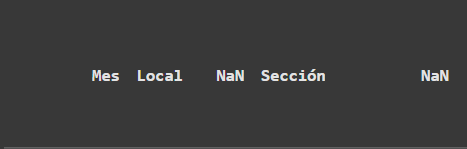

In [7]:
#Renombro
df.columns.values[2] = 'Unidad de Negocio'
df.columns.values[3] = 'Codigo de la Sección'
df.columns.values[4] = 'Sección del local'

#Chequeo
display(df.head(5))


,Mes,Local,Unidad de Negocio,Codigo de la Sección,Sección del local,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto,Var Año Anterior Ticket Rema Local %,Var Año Anterior Ticket Retail Local %
0,Noviembre,E145,EASY SAN LUIS,12,SECCIÃN TEXTIL HOGAR,30130015,0.61,27140736,0.6858,1434,1554,1.0023,-2548,-2117,0.5122,15047702.641962,0.025201,49393467.213115,NaN,NaN
1,Noviembre,E145,EASY SAN LUIS,13,SECCIÃN FERRETERIA,39273987,0.76,31324644,0.8288,1869,1794,0.881,-2548,-2117,0.4524,20879312.599681,0.032849,51676298.684211,NaN,NaN
2,Noviembre,E145,EASY SAN LUIS,16,SECCIÃN MENAJE Y DECO,44328939,0.7,39868081,0.7312,2110,2283,2.1273,-2548,-2117,0.6205,14174827.806734,0.037077,63327055.714286,NaN,NaN
3,Noviembre,E145,EASY SAN LUIS,23,SECCIÃN OUTDOOR,63827858,0.55,56477482,0.5972,3038,3234,1.14,-2548,-2117,0.5137,29826101.869159,0.053385,116050650.909091,NaN,NaN
4,Noviembre,E145,EASY SAN LUIS,39,SECCIÃN ELECTRO HOGAR,97210822,0.58,72210900,0.6314,4627,4135,0.6642,-2548,-2117,0.2616,58412944.357649,0.081307,167604865.517241,NaN,NaN


In [8]:
#Eliminamos columnas sin datos:
columnas_a_eliminar= ['Var Año Anterior Ticket Rema Local %','Var Año Anterior Ticket Retail Local %']
df.drop(columnas_a_eliminar,axis=1,inplace=True)

### Esta columna posee caracteres especiales o hay un problema con la forma en que lee por defecto al dataset <br>



In [9]:
  df['Sección del local']

,Sección del local
0,SECCIÃN TEXTIL HOGAR
1,SECCIÃN FERRETERIA
2,SECCIÃN MENAJE Y DECO
3,SECCIÃN OUTDOOR
4,SECCIÃN ELECTRO HOGAR
5,SECCIÃN BAÃOS Y COCINAS
6,SECCIÃN CONSTRUCCIÃN
7,SECCIÃN HERRAMIENTAS
8,SECCIÃN AUTOMOTOR
9,SECCIÃN MUEBLES


In [10]:
# Corregir caracteres especiales en la columna específica
df['Sección del local'] = df['Sección del local'].str.encode('latin-1').str.decode('utf-8')

df.head(5)

,Mes,Local,Unidad de Negocio,Codigo de la Sección,Sección del local,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto
0,Noviembre,E145,EASY SAN LUIS,12,SECCIÓN TEXTIL HOGAR,30130015,0.61,27140736,0.6858,1434,1554,1.0023,-2548,-2117,0.5122,15047702.641962,0.025201,49393467.213115
1,Noviembre,E145,EASY SAN LUIS,13,SECCIÓN FERRETERIA,39273987,0.76,31324644,0.8288,1869,1794,0.881,-2548,-2117,0.4524,20879312.599681,0.032849,51676298.684211
2,Noviembre,E145,EASY SAN LUIS,16,SECCIÓN MENAJE Y DECO,44328939,0.7,39868081,0.7312,2110,2283,2.1273,-2548,-2117,0.6205,14174827.806734,0.037077,63327055.714286
3,Noviembre,E145,EASY SAN LUIS,23,SECCIÓN OUTDOOR,63827858,0.55,56477482,0.5972,3038,3234,1.14,-2548,-2117,0.5137,29826101.869159,0.053385,116050650.909091
4,Noviembre,E145,EASY SAN LUIS,39,SECCIÓN ELECTRO HOGAR,97210822,0.58,72210900,0.6314,4627,4135,0.6642,-2548,-2117,0.2616,58412944.357649,0.081307,167604865.517241


## Comenzamos con Estadísticas Descriptivas

In [11]:
df['Ticket Promedio Retail Local ($)'].describe()

,Ticket Promedio Retail Local ($)
count,21
unique,21
top,1554
freq,1


### Al ver este Output anterior se puede ver que toma la columna como tipo Object. <br>
### Esto quiere decir que pandas no permite aplicar ningun metodo descriptivo si lee las columnas numericas como objetos.

In [12]:
# Muestra el tipo de datos de cada columna
print(df.dtypes)

0
Mes                                         object
Local                                       object
Unidad de Negocio                           object
Codigo de la Sección                        object
Sección del local                           object
Venta REMA ($)                              object
Index Venta REMA (%)                        object
Venta Retail ($)                            object
Index Venta Retail (%)                      object
Ticket Promedio REMA Local ($)              object
Ticket Promedio Retail Local ($)            object
Var Año Anterior Venta REMA (%)             object
Var Año Anterior Ticket REMA Local (Q)      object
Var Año Anterior Ticket Retail Local (Q)    object
Margen Local %                              object
Vta Año anterior                            object
Participacion                               object
Presupuesto                                 object
dtype: object


In [13]:
# Resuelvo este inconveniente
#Creo arreglo con las columnas con datos numericos
columnas_a_convertir = ['Venta REMA ($)','Index Venta REMA (%)',
                               'Venta Retail ($)',
                         'Index Venta Retail (%)',
                 'Ticket Promedio REMA Local ($)',
               'Ticket Promedio Retail Local ($)',
                'Var Año Anterior Venta REMA (%)',
         'Var Año Anterior Ticket REMA Local (Q)',
       'Var Año Anterior Ticket Retail Local (Q)',
                                 'Margen Local %',
                               'Vta Año anterior',
                                  'Participacion',
                                    'Presupuesto']

In [14]:
# Convertir a string y luego limpiar caracteres especiales
for col in columnas_a_convertir:
    df[col] = df[col].astype(str).str.replace('[\$,%,]', '', regex=True)

    # Convertir a float, manejando errores
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
#Chequeo la conversion:
print(df.dtypes)

0
Mes                                          object
Local                                        object
Unidad de Negocio                            object
Codigo de la Sección                         object
Sección del local                            object
Venta REMA ($)                                int64
Index Venta REMA (%)                        float64
Venta Retail ($)                              int64
Index Venta Retail (%)                      float64
Ticket Promedio REMA Local ($)                int64
Ticket Promedio Retail Local ($)              int64
Var Año Anterior Venta REMA (%)             float64
Var Año Anterior Ticket REMA Local (Q)        int64
Var Año Anterior Ticket Retail Local (Q)      int64
Margen Local %                              float64
Vta Año anterior                            float64
Participacion                               float64
Presupuesto                                 float64
dtype: object


## Ahora luego de esas modificaciones puedo comenzar a trabajar en los numeros:

In [16]:
df.describe()

,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto
count,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.000000,2.100000e+01,20.000000,2.100000e+01
mean,1.138673e+08,0.665714,8.715585e+07,0.729433,5419.857143,4990.428571,0.867219,-2548.0,-2117.0,0.391200,6.536227e+07,0.050000,1.760576e+08
std,2.506757e+08,0.164517,1.916589e+08,0.183616,11931.787981,10973.801441,0.592036,0.0,0.0,0.104328,1.439484e+08,0.032164,3.872575e+08
min,1.005048e+07,0.310000,8.841588e+06,0.310200,478.000000,506.000000,-0.385200,-2548.0,-2117.0,0.219100,5.824675e+06,0.008406,1.456591e+07
25%,3.992427e+07,0.580000,3.132464e+07,0.631400,1900.000000,1794.000000,0.570800,-2548.0,-2117.0,0.315200,2.087931e+07,0.033256,5.193110e+07
50%,4.778226e+07,0.680000,3.986808e+07,0.729300,2274.000000,2283.000000,0.742100,-2548.0,-2117.0,0.360300,2.728522e+07,0.039088,8.460439e+07
75%,8.269690e+07,0.720000,5.647748e+07,0.829500,3936.000000,3234.000000,1.017000,-2548.0,-2117.0,0.471300,4.815247e+07,0.059111,1.234957e+08
max,1.195607e+09,1.160000,9.151364e+08,1.235300,56909.000000,52398.000000,2.127300,-2548.0,-2117.0,0.620500,6.863021e+08,0.151785,1.848605e+09


### Se ve que los datos se muestran en un formato poco entendible. Para ello se formatea la forma de visualizacion de los datos Float

In [17]:
# Configurar el formato de visualización para mostrar máximo dos decimales
pd.set_option('display.float_format', '{:.2f}'.format)

#Chequeo
df.describe()

,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,20.00,21.00
mean,113867320.76,0.67,87155848.62,0.73,5419.86,4990.43,0.87,-2548.00,-2117.00,0.39,65362271.55,0.05,176057629.62
std,250675698.18,0.16,191658898.89,0.18,11931.79,10973.80,0.59,0.00,0.00,0.10,143948440.77,0.03,387257460.88
min,10050477.00,0.31,8841588.00,0.31,478.00,506.00,-0.39,-2548.00,-2117.00,0.22,5824675.17,0.01,14565908.70
25%,39924266.00,0.58,31324644.00,0.63,1900.00,1794.00,0.57,-2548.00,-2117.00,0.32,20879312.60,0.03,51931101.22
50%,47782264.00,0.68,39868081.00,0.73,2274.00,2283.00,0.74,-2548.00,-2117.00,0.36,27285217.99,0.04,84604387.04
75%,82696902.00,0.72,56477482.00,0.83,3936.00,3234.00,1.02,-2548.00,-2117.00,0.47,48152473.04,0.06,123495725.53
max,1195606869.00,1.16,915136410.00,1.24,56909.00,52398.00,2.13,-2548.00,-2117.00,0.62,686302088.86,0.15,1848605111.06


## Se puede ver un valores Nan en la ultima fila

In [18]:
df['Sección del local']

,Sección del local
0,SECCIÓN TEXTIL HOGAR
1,SECCIÓN FERRETERIA
2,SECCIÓN MENAJE Y DECO
3,SECCIÓN OUTDOOR
4,SECCIÓN ELECTRO HOGAR
5,SECCIÓN BAÑOS Y COCINAS
6,SECCIÓN CONSTRUCCIÓN
7,SECCIÓN HERRAMIENTAS
8,SECCIÓN AUTOMOTOR
9,SECCIÓN MUEBLES


## Si bien en el archivo de excel no generaba ningun problema los valores nulos o vacios para poder trabajar con ellos se debe resolver esta situación

In [19]:
#Trabajo con los datos que estan generando problemas a la hora de graficar:

df['Sección del local'] = df['Sección del local'].fillna(0)  # Reemplazar NaN con 0


df['Codigo de la Sección'] = df['Codigo de la Sección'].fillna(0)


df['Unidad de Negocio'] = df['Unidad de Negocio'].fillna(0)


df['Local'] = df['Local'].fillna(0)
df['Local'] = df['Local'].fillna(0)


/tmp/ipython-input-2177142966.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Codigo de la Sección'] = df['Codigo de la Sección'].fillna(0)


In [20]:
df.tail()

,Mes,Local,Unidad de Negocio,Codigo de la Sección,Sección del local,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto
16,Noviembre,E145,EASY SAN LUIS,57,SECCIÓN MADERAS,47782264,0.68,33657028,0.83,2274,1927,1.15,-2548,-2117,0.33,22228444.36,0.04,70268035.29
17,Noviembre,E145,EASY SAN LUIS,58,SECCIÓN PLOMERÍA,39924266,0.58,30725367,0.70,1900,1759,0.55,-2548,-2117,0.36,25712800.93,0.03,68834941.38
18,Noviembre,E145,EASY SAN LUIS,59,SECCIÓN ORGANIZADORES,42811491,1.16,37194932,1.24,2038,2130,1.90,-2548,-2117,0.50,14782973.41,0.04,36906457.76
19,Noviembre,E145,EASY SAN LUIS,64,SECCION AMPOLLETAS Y TUBOS,10050477,0.69,8841588,0.74,478,506,0.73,-2548,-2117,0.51,5824675.17,0.01,14565908.70
20,Total,0,0,0,0,1195606869,0.65,915136410,0.70,56909,52398,0.74,-2548,-2117,0.36,686302088.86,NaN,1848605111.06


## Vemos un valor nulo en donde deberia ir el total de la participacion: Se resuelve de la siguiente manera

In [21]:
suma_participacion = df['Participacion'].sum(skipna=True)

df['Participacion'].fillna(suma_participacion, inplace=True)

/tmp/ipython-input-4035530719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Participacion'].fillna(suma_participacion, inplace=True)


In [22]:
df.tail()

,Mes,Local,Unidad de Negocio,Codigo de la Sección,Sección del local,Venta REMA ($),Index Venta REMA (%),Venta Retail ($),Index Venta Retail (%),Ticket Promedio REMA Local ($),Ticket Promedio Retail Local ($),Var Año Anterior Venta REMA (%),Var Año Anterior Ticket REMA Local (Q),Var Año Anterior Ticket Retail Local (Q),Margen Local %,Vta Año anterior,Participacion,Presupuesto
16,Noviembre,E145,EASY SAN LUIS,57,SECCIÓN MADERAS,47782264,0.68,33657028,0.83,2274,1927,1.15,-2548,-2117,0.33,22228444.36,0.04,70268035.29
17,Noviembre,E145,EASY SAN LUIS,58,SECCIÓN PLOMERÍA,39924266,0.58,30725367,0.70,1900,1759,0.55,-2548,-2117,0.36,25712800.93,0.03,68834941.38
18,Noviembre,E145,EASY SAN LUIS,59,SECCIÓN ORGANIZADORES,42811491,1.16,37194932,1.24,2038,2130,1.90,-2548,-2117,0.50,14782973.41,0.04,36906457.76
19,Noviembre,E145,EASY SAN LUIS,64,SECCION AMPOLLETAS Y TUBOS,10050477,0.69,8841588,0.74,478,506,0.73,-2548,-2117,0.51,5824675.17,0.01,14565908.70
20,Total,0,0,0,0,1195606869,0.65,915136410,0.70,56909,52398,0.74,-2548,-2117,0.36,686302088.86,1.00,1848605111.06


# Luego de un buen trabajo de limpieza y saneamiento del dataset pordemos guardarlo para comenzar a trabajar con los graficos en Power BI

In [23]:
!pip install openpyxl

In [30]:
# Guardo ambos análisis en un Excel
with pd.ExcelWriter("datos_e145.xlsx", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="datos_acumulados_e145", index=False)


In [31]:
# Descargo el archivo
files.download("datos_e145.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>